In [157]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pylab as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, MinMaxScaler
from sklearn.model_selection import GroupShuffleSplit
from sklearn.model_selection import GroupKFold
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.svm import SVR, SVC
from sklearn.datasets import make_moons
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import matplotlib
from sklearn.linear_model import Lasso, Ridge, ElasticNet, LogisticRegression, LinearRegression
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, GroupShuffleSplit, GroupKFold, StratifiedKFold
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.pipeline import make_pipeline, Pipeline
import xgboost
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import classification_report, roc_auc_score, f1_score, fbeta_score
import time
import gc

In [2]:
wwine = pd.read_csv('data/winequality-white.csv', delimiter = ";") 
rwine = pd.read_csv('data/winequality-red.csv', delimiter = ";")
frames1 = [wwine, rwine]
allwine = pd.concat(frames1)
allwine.reset_index(drop=True, inplace=True)
allwine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
6494,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
#wwine2 = wwine[]
#rwine2 = rwine[]
#wwine2["type"] = "White Wine"
#rwine2["type"] = "Red Wine"

In [4]:
#frames2 = [wwine2, rwine2]

#allwine2 = pd.concat(frames2)
#allwine2.reset_index(drop=True, inplace=True)

In [7]:
pd.set_option('display.max_rows', 15)
allwine.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

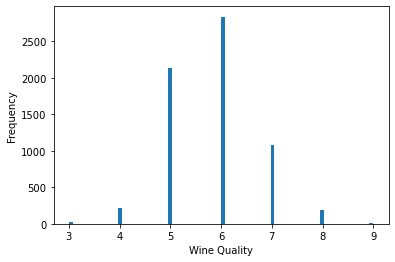

In [8]:
allwine['quality'].plot.hist(bins = int(np.sqrt(allwine.shape[0]))) 
plt.xlabel('Wine Quality')
plt.show()

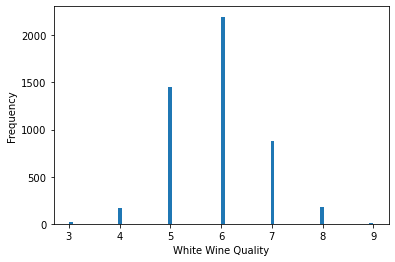

In [250]:
wwine['quality'].plot.hist(bins = int(np.sqrt(allwine.shape[0]))) 
plt.xlabel('White Wine Quality')
plt.savefig('figures/wwine_count.png',dpi=300)
plt.show()

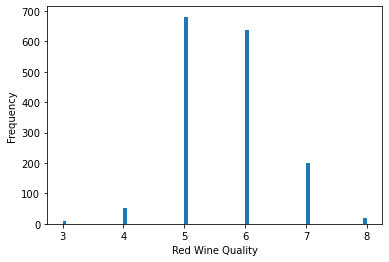

In [249]:
rwine['quality'].plot.hist(bins = int(np.sqrt(allwine.shape[0]))) 
plt.xlabel('Red Wine Quality')
plt.savefig('figures/rwine_count.png',dpi=300)
plt.show()

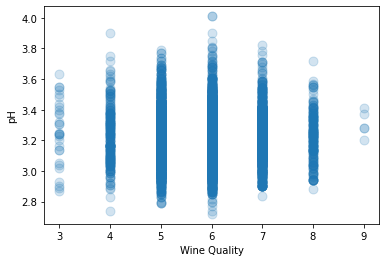

In [11]:
allwine.plot.scatter('quality','pH',alpha=0.2,s=80)
plt.ylabel('pH')
plt.xlabel('Wine Quality')
plt.show()

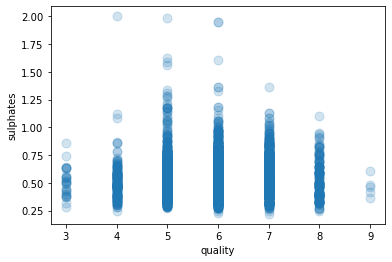

In [12]:
allwine.plot.scatter('quality','sulphates',alpha=0.2,s=80) # alpha=0.1,s=10
plt.show()

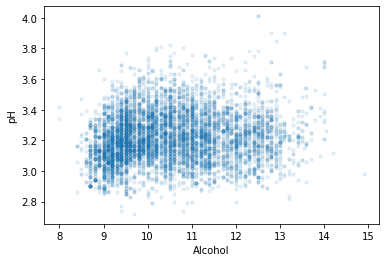

In [13]:
allwine.plot.scatter('alcohol','pH',alpha=0.1,s=10)
plt.ylabel('pH')
plt.xlabel('Alcohol')
plt.show()

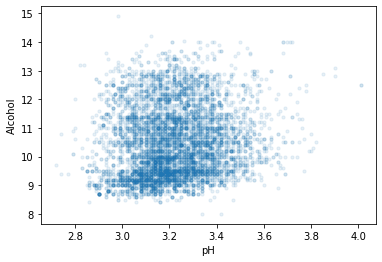

In [14]:
allwine.plot.scatter('pH','alcohol',alpha=0.1,s=10)
plt.ylabel('Alcohol')
plt.xlabel('pH')
plt.show()

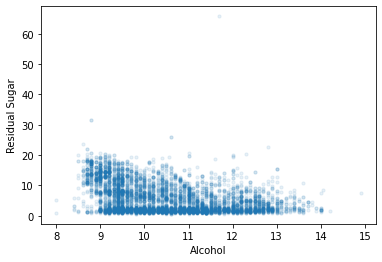

In [15]:
allwine.plot.scatter('alcohol','residual sugar',alpha=0.1,s=10)
plt.ylabel('Residual Sugar')
plt.xlabel('Alcohol')
plt.show()

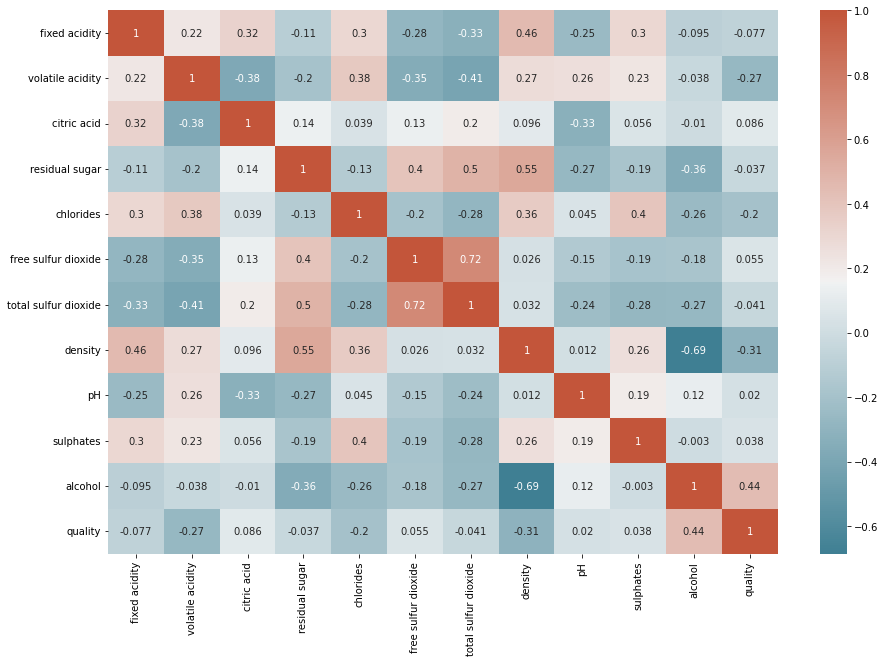

In [9]:
corr = allwine.corr()
matplotlib.pyplot.subplots(figsize=(15,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))
plt.savefig('figures/allwine_corr.png',dpi=300)

<AxesSubplot:>

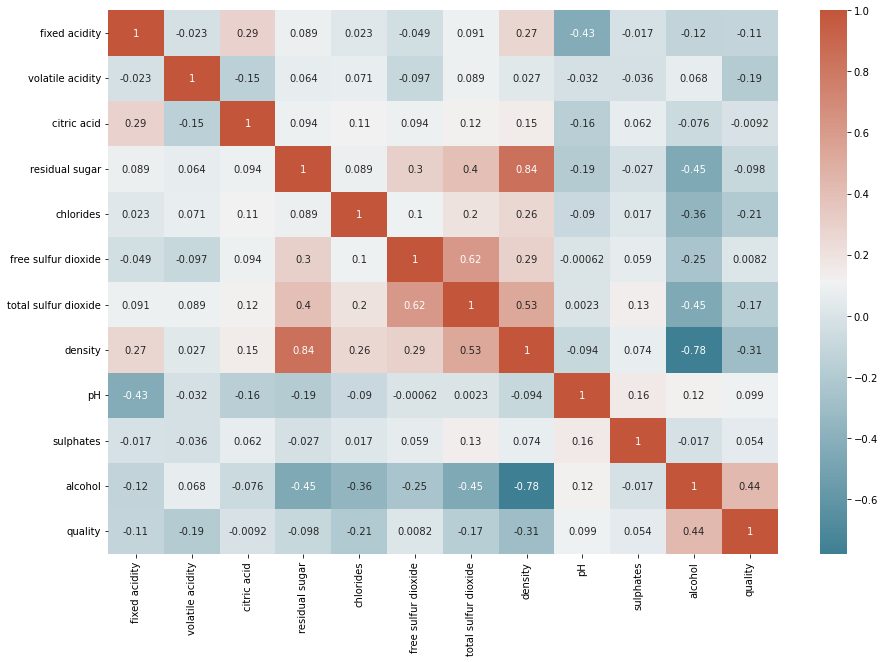

In [255]:
corr = wwine.corr()
matplotlib.pyplot.subplots(figsize=(15,10))
plt.xlabel('xlabel', fontsize=20)
plt.ylabel('ylabel', fontsize=20)
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))
#plt.savefig('figures/wwine_corr.png',dpi=300)

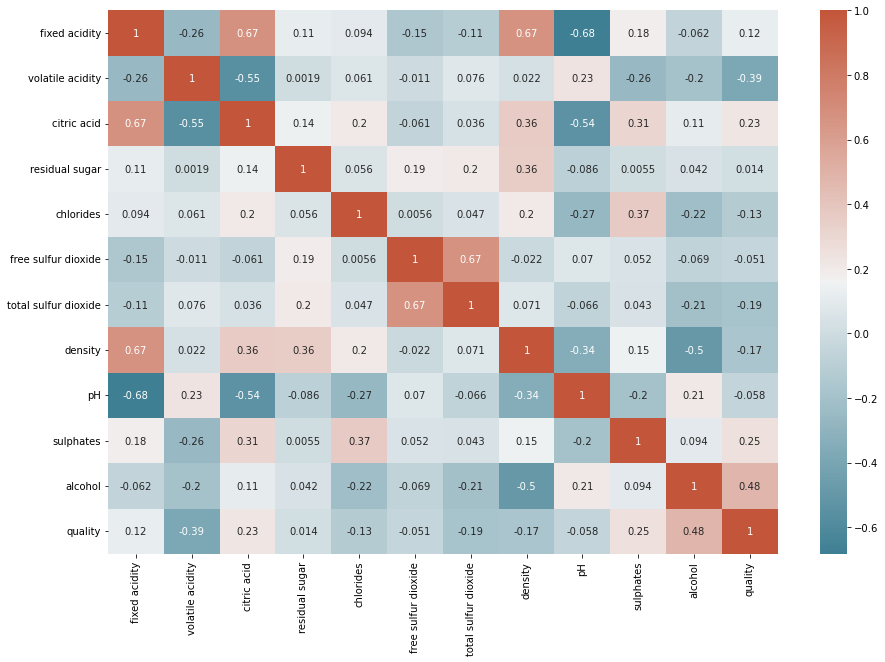

In [248]:
corr = rwine.corr()
matplotlib.pyplot.subplots(figsize=(15,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))
plt.savefig('figures/rwine_corr.png',dpi=300)

In [23]:
#allwine[['type','quality']].boxplot(by='type')
#plt.ylabel('quality')
#plt.show()

In [24]:
#allwine[['type','alcohol']].boxplot(by='type')
#plt.ylabel('alcohol')
#plt.show()

In [25]:
#allwine[['type','pH']].boxplot(by='type')
#plt.ylabel('pH')
#plt.show()

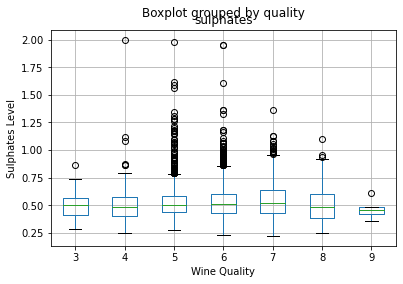

In [26]:
allwine[['quality','sulphates']].boxplot(by='quality')
plt.xlabel('Wine Quality')
plt.ylabel('Sulphates Level')
plt.show()

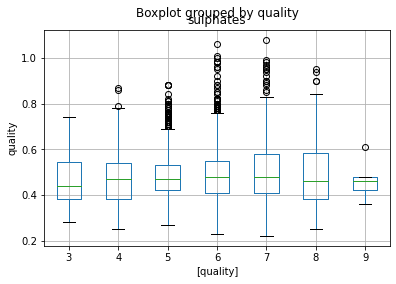

In [27]:
wwine[['quality','sulphates']].boxplot(by='quality')
plt.ylabel('quality')
plt.show()

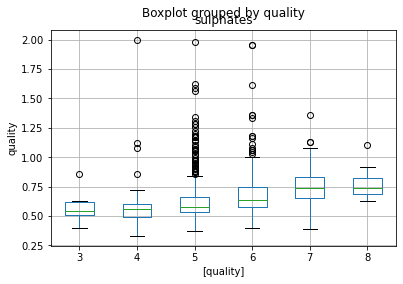

In [28]:
rwine[['quality','sulphates']].boxplot(by='quality')
plt.ylabel('quality')
plt.show()

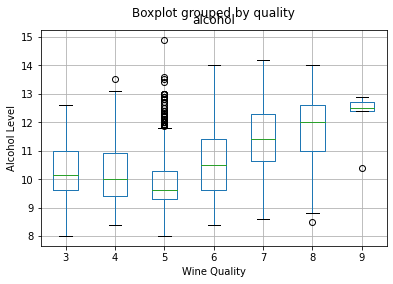

In [29]:
allwine[['quality','alcohol']].boxplot(by='quality')
plt.ylabel('Alcohol Level')
plt.xlabel('Wine Quality')
plt.show()

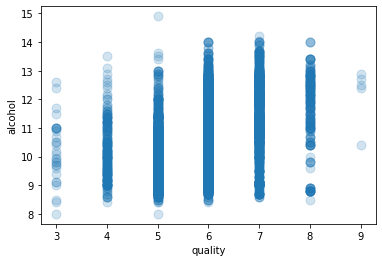

In [30]:
allwine.plot.scatter('quality','alcohol',alpha=0.2,s=80)
plt.show()

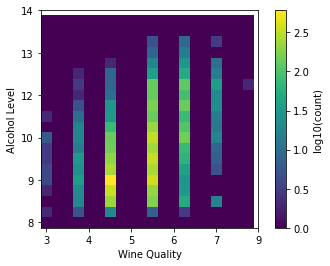

In [31]:
nbins = 20

heatmap, xedges, yedges = np.histogram2d(allwine['quality'], allwine['alcohol'], bins=nbins)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
heatmap[heatmap == 0] = 0.1 # we will use log and log(0) is undefined

plt.imshow(np.log10(heatmap).T, origin='lower',vmin=0) # use log count
plt.xlabel('Wine Quality')
plt.ylabel('Alcohol Level')
plt.xticks(np.arange(nbins+1)[::4],xedges[::4].astype(int))
plt.yticks(np.arange(nbins+1)[::4],yedges[::4].astype(int))
plt.colorbar(label='log10(count)')
plt.show()

In [3]:
wy = wwine['quality']
wX = wwine.loc[:, wwine.columns != 'quality'] 
ry = rwine['quality']
rX = rwine.loc[:, rwine.columns != 'quality'] 
yall = allwine['quality']
Xall = allwine.loc[:, allwine.columns != 'quality'] 

In [33]:
random_state = 44
wX_other, wX_test, wy_other, wy_test = train_test_split(wX,wy,test_size = 0.2,stratify=wy,random_state=random_state)
print('test balance:',wy_test.value_counts(normalize=True))

kf = StratifiedKFold(n_splits=4,shuffle=True,random_state=random_state)

for train_index, val_index in kf.split(wX_other,wy_other):
    wX_train = wX_other.iloc[train_index]
    wy_train = wy_other.iloc[train_index]
    wX_val = wX_other.iloc[val_index]
    wy_val = wy_other.iloc[val_index]
    print('train balance:')
    print(wy_train.value_counts(normalize=True))
    print('val balance:')
    print(wy_val.value_counts(normalize=True))

test balance: 6    0.448980
5    0.296939
7    0.179592
8    0.035714
4    0.033673
3    0.004082
9    0.001020
Name: quality, dtype: float64
train balance:
6    0.448604
5    0.297822
7    0.179714
8    0.035739
4    0.033016
3    0.004084
9    0.001021
Name: quality, dtype: float64
val balance:
6    0.448980
5    0.296939
7    0.179592
8    0.035714
4    0.033673
3    0.004082
9    0.001020
Name: quality, dtype: float64
train balance:
6    0.448604
5    0.297822
7    0.179714
8    0.035739
4    0.033016
3    0.004084
9    0.001021
Name: quality, dtype: float64
val balance:
6    0.448980
5    0.296939
7    0.179592
8    0.035714
4    0.033673
3    0.004082
9    0.001020
Name: quality, dtype: float64
train balance:
6    0.448792
5    0.297380
7    0.179653
8    0.035726
4    0.033345
3    0.004083
9    0.001021
Name: quality, dtype: float64
val balance:
6    0.448417
5    0.298264
7    0.179775
8    0.035751
4    0.032686
3    0.004086
9    0.001021
Name: quality, dtype: float64
train 

In [34]:
rX_other, rX_test, ry_other, ry_test = train_test_split(rX,ry,test_size = 0.2,stratify=ry,random_state=random_state)
print('test balance:',ry_test.value_counts(normalize=True))

for train_index, val_index in kf.split(rX_other,ry_other):
    rX_train = rX_other.iloc[train_index]
    ry_train = ry_other.iloc[train_index]
    rX_val = rX_other.iloc[val_index]
    ry_val = ry_other.iloc[val_index]
    print('train balance:')
    print(ry_train.value_counts(normalize=True))
    print('val balance:')
    print(ry_val.value_counts(normalize=True))

test balance: 5    0.425000
6    0.400000
7    0.125000
4    0.034375
8    0.009375
3    0.006250
Name: quality, dtype: float64
train balance:
5    0.425443
6    0.399374
7    0.124088
4    0.033368
8    0.011470
3    0.006257
Name: quality, dtype: float64
val balance:
5    0.428125
6    0.396875
7    0.125000
4    0.031250
8    0.012500
3    0.006250
Name: quality, dtype: float64
train balance:
5    0.426486
6    0.398332
7    0.124088
4    0.033368
8    0.011470
3    0.006257
Name: quality, dtype: float64
val balance:
5    0.42500
6    0.40000
7    0.12500
4    0.03125
8    0.01250
3    0.00625
Name: quality, dtype: float64
train balance:
5    0.426486
6    0.398332
7    0.125130
4    0.032325
8    0.011470
3    0.006257
Name: quality, dtype: float64
val balance:
5    0.425000
6    0.400000
7    0.121875
4    0.034375
8    0.012500
3    0.006250
Name: quality, dtype: float64
train balance:
5    0.426042
6    0.398958
7    0.123958
4    0.032292
8    0.012500
3    0.006250
Name: quali

In [35]:
Xall_other, Xall_test, yall_other, yall_test = train_test_split(Xall,yall,test_size = 0.2,stratify=yall,random_state=random_state)
print('test balance:',yall_test.value_counts(normalize=True))

for train_index, val_index in kf.split(Xall_other,yall_other):
    Xall_train = Xall_other.iloc[train_index]
    yall_train = yall_other.iloc[train_index]
    Xall_val = Xall_other.iloc[val_index]
    yall_val = yall_other.iloc[val_index]
    print('train balance:')
    print(yall_train.value_counts(normalize=True))
    print('val balance:')
    print(yall_val.value_counts(normalize=True))

test balance: 6    0.436154
5    0.329231
7    0.166154
4    0.033077
8    0.030000
3    0.004615
9    0.000769
Name: quality, dtype: float64
train balance:
6    0.436490
5    0.329228
7    0.166025
4    0.033102
8    0.029766
3    0.004619
9    0.000770
Name: quality, dtype: float64
val balance:
6    0.436923
5    0.328462
7    0.166154
4    0.033846
8    0.029231
3    0.004615
9    0.000769
Name: quality, dtype: float64
train balance:
6    0.436634
5    0.328887
7    0.165983
4    0.033350
8    0.029759
3    0.004618
9    0.000770
Name: quality, dtype: float64
val balance:
6    0.436490
5    0.329484
7    0.166282
4    0.033102
8    0.029253
3    0.004619
9    0.000770
Name: quality, dtype: float64
train balance:
6    0.436634
5    0.328887
7    0.166239
4    0.033350
8    0.029502
3    0.004618
9    0.000770
Name: quality, dtype: float64
val balance:
6    0.436490
5    0.329484
7    0.165512
4    0.033102
8    0.030023
3    0.004619
9    0.000770
Name: quality, dtype: float64
train 

In [36]:
scaler = MinMaxScaler()

wX_train_prep = scaler.fit_transform(wX_train)
wX_test_prep = scaler.transform(wX_test) 
wX_val_prep = scaler.transform(wX_val)
print(wX_train_prep)
print(wX_test_prep)
print(wX_val_prep)

[[0.30097087 0.05882353 0.24096386 ... 0.38834951 0.23255814 0.61290323]
 [0.46601942 0.14705882 0.19277108 ... 0.32038835 0.29069767 0.12903226]
 [0.30097087 0.06862745 0.1686747  ... 0.16504854 0.19767442 0.16129032]
 ...
 [0.3592233  0.19607843 0.10240964 ... 0.2815534  0.24418605 0.32258065]
 [0.23300971 0.18627451 0.29518072 ... 0.57281553 0.23255814 0.67741935]
 [0.27184466 0.04901961 0.19277108 ... 0.32038835 0.25581395 0.32258065]]
[[0.21359223 0.25490196 0.27710843 ... 0.48543689 0.46511628 0.69354839]
 [0.39805825 0.16666667 0.29518072 ... 0.2815534  0.13953488 0.22580645]
 [0.27184466 0.16666667 0.18674699 ... 0.3592233  0.36046512 0.24193548]
 ...
 [0.34951456 0.16666667 0.19277108 ... 0.32038835 0.27906977 0.4516129 ]
 [0.33009709 0.31372549 0.15662651 ... 0.04854369 0.37209302 0.83870968]
 [0.39805825 0.16666667 0.1626506  ... 0.19417476 0.1627907  0.51612903]]
[[0.29126214 0.18627451 0.29518072 ... 0.18446602 0.29069767 0.09677419]
 [0.33980583 0.11764706 0.22289157 ... 

In [37]:
rX_train_prep = scaler.fit_transform(rX_train)
rX_test_prep = scaler.transform(rX_test) 
rX_val_prep = scaler.transform(rX_val)
print(rX_train_prep)
print(rX_test_prep)
print(rX_val_prep)

[[0.19642857 0.34931507 0.43421053 ... 0.31304348 0.10691824 0.16923077]
 [0.23214286 0.39383562 0.         ... 0.54782609 0.08176101 0.12307692]
 [0.23214286 0.18493151 0.40789474 ... 0.47826087 0.09433962 0.15384615]
 ...
 [0.34821429 0.06849315 0.47368421 ... 0.53043478 0.30188679 0.4       ]
 [0.39285714 0.2260274  0.46052632 ... 0.45217391 0.14465409 0.16923077]
 [0.32142857 0.14383562 0.55263158 ... 0.45217391 0.23899371 0.66153846]]
[[0.24107143 0.25342466 0.35526316 ... 0.42608696 0.1509434  0.55384615]
 [0.39285714 0.16438356 0.51315789 ... 0.27826087 0.27044025 0.4       ]
 [0.35714286 0.39041096 0.40789474 ... 0.53913043 0.22012579 0.49230769]
 ...
 [0.33035714 0.18493151 0.13157895 ... 0.2        0.02515723 0.2       ]
 [0.29464286 0.20547945 0.22368421 ... 0.37391304 0.13836478 0.12307692]
 [0.13392857 0.45547945 0.         ... 0.63478261 0.13836478 0.24615385]]
[[ 0.38392857  0.45547945  0.31578947 ...  0.37391304  0.17610063
   0.24615385]
 [ 0.52678571  0.15068493  0.64

In [38]:
Xall_train_prep = scaler.fit_transform(Xall_train)
Xall_test_prep = scaler.transform(Xall_test) 
Xall_val_prep = scaler.transform(Xall_val)
print(Xall_train_prep)
print(Xall_test_prep)
print(Xall_val_prep)

[[0.19008264 0.064      0.14457831 ... 0.72868217 0.19662921 0.33333333]
 [0.31404959 0.32       0.18674699 ... 0.27131783 0.21910112 0.20289855]
 [0.31404959 0.176      0.15060241 ... 0.31007752 0.15168539 0.17391304]
 ...
 [0.65289256 0.16       0.28313253 ... 0.33333333 0.25280899 0.37681159]
 [0.3553719  0.136      0.22891566 ... 0.37984496 0.08988764 0.50724638]
 [0.16528926 0.136      0.1686747  ... 0.54263566 0.11797753 0.2173913 ]]
[[0.16528926 0.088      0.19879518 ... 0.34108527 0.11235955 0.47826087]
 [0.30578512 0.484      0.04216867 ... 0.51162791 0.18539326 0.42028986]
 [0.24793388 0.224      0.14457831 ... 0.42635659 0.06741573 0.66666667]
 ...
 [0.28099174 0.08       0.18674699 ... 0.46511628 0.1011236  0.4057971 ]
 [0.31404959 0.272      0.04819277 ... 0.37984496 0.20786517 0.28985507]
 [0.31404959 0.264      0.08433735 ... 0.46511628 0.19662921 0.36231884]]
[[0.21487603 0.04       0.1686747  ... 0.58139535 0.16853933 0.46376812]
 [0.34710744 0.392      0.23493976 ... 

In [39]:
Xall_train_prep.shape

(3898, 11)

In [40]:
Xall_val_prep.shape

(1299, 11)

In [41]:
Xall_test_prep.shape

(1300, 11)

In [42]:
wX_train_prep.shape

(2939, 11)

In [43]:
wX_val_prep.shape

(979, 11)

In [44]:
wX_test_prep.shape

(980, 11)

In [45]:
rX_train_prep.shape

(960, 11)

In [47]:
rX_val_prep.shape

(319, 11)

In [49]:
rX_test_prep.shape

(320, 11)

In [12]:
wy = wwine['quality']
wX = wwine.loc[:, wwine.columns != 'quality'] 
ry = rwine['quality']
rX = rwine.loc[:, rwine.columns != 'quality'] 

In [233]:
def MLpipe_KFold(X, y, preprocessor, ML_algo, param_grid):
    '''
    This function splits the data to other/test (80/20) and then applies KFold with 4 folds to other.
    '''
    
    test_scores = []
    final_models = []
    best_para = []
    
    for i in range(10):
            X_other, X_test, y_other, y_test = train_test_split(X, y, test_size = 0.2, random_state = 44 * i)
            k = KFold(n_splits = 4, shuffle = True, random_state = 44 * i)

            clf = ML_algo
            pipeline = make_pipeline(preprocessor, clf)
            grid = GridSearchCV(pipeline, param_grid = param_grid, scoring = make_scorer(accuracy_score),
                                cv = k, return_train_score = True, n_jobs = -1, verbose = True)

            grid.fit(X_other, y_other)
            best_para = grid.best_params_
            y_pred = grid.predict(X_test)
            test_score = accuracy_score(y_test, y_pred)
            test_scores.append(test_score)
            final_models.append(grid.best_estimator_)
        
    return final_models, test_scores

num_ftrs = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']


# standard scaler
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

# collect the transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_ftrs)])


In [181]:
log = LogisticRegression()
log_param_grid = {'logisticregression__max_iter': [100000]}

log_r_final, log_r_scores = MLpipe_KFold(rX, ry, preprocessor, log, log_param_grid)
r_logistic_models = log_r_scores
print(r_logistic_models)
print("Mean", {np.mean(r_logistic_models)}, "std", {np.std(r_logistic_models)})

Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
[0.634375, 0.603125, 0.575, 0.584375, 0.6, 0.58125, 0.590625, 0.54375, 0.571875, 0.625]
Mean {0.5909375} std {0.025017571949531806}


In [182]:
l1 = LogisticRegression(penalty='l1', solver='saga')
l1_param_grid = {'logisticregression__C': [1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3, 1e4],
              'logisticregression__max_iter': [100000]}


l1_r_final, l1_r_scores = MLpipe_KFold(rX, ry, preprocessor, l1, l1_param_grid)
r_l1_models = l1_r_scores
print(r_l1_models)
print("Mean", {np.mean(r_l1_models)}, "std", {np.std(r_l1_models)})

Fitting 4 folds for each of 9 candidates, totalling 36 fits
Fitting 4 folds for each of 9 candidates, totalling 36 fits
Fitting 4 folds for each of 9 candidates, totalling 36 fits
Fitting 4 folds for each of 9 candidates, totalling 36 fits
Fitting 4 folds for each of 9 candidates, totalling 36 fits
Fitting 4 folds for each of 9 candidates, totalling 36 fits
Fitting 4 folds for each of 9 candidates, totalling 36 fits
Fitting 4 folds for each of 9 candidates, totalling 36 fits
Fitting 4 folds for each of 9 candidates, totalling 36 fits
Fitting 4 folds for each of 9 candidates, totalling 36 fits
[0.634375, 0.603125, 0.56875, 0.584375, 0.596875, 0.559375, 0.590625, 0.553125, 0.56875, 0.628125]
Mean {0.5887499999999999} std {0.026190408549696228}


In [183]:
l2 = LogisticRegression(penalty='l2', solver='saga')
l2_param_grid = {'logisticregression__C': [1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3, 1e4],
              'logisticregression__max_iter': [100000]}


l2_r_final, l2_r_scores = MLpipe_KFold(rX, ry, preprocessor, l2, l2_param_grid)
r_l2_models = l2_r_scores
print(r_l2_models)
print("Mean", {np.mean(r_l2_models)}, "std", {np.std(r_l2_models)})

Fitting 4 folds for each of 9 candidates, totalling 36 fits
Fitting 4 folds for each of 9 candidates, totalling 36 fits
Fitting 4 folds for each of 9 candidates, totalling 36 fits
Fitting 4 folds for each of 9 candidates, totalling 36 fits
Fitting 4 folds for each of 9 candidates, totalling 36 fits
Fitting 4 folds for each of 9 candidates, totalling 36 fits
Fitting 4 folds for each of 9 candidates, totalling 36 fits
Fitting 4 folds for each of 9 candidates, totalling 36 fits
Fitting 4 folds for each of 9 candidates, totalling 36 fits
Fitting 4 folds for each of 9 candidates, totalling 36 fits
[0.634375, 0.6, 0.575, 0.584375, 0.603125, 0.575, 0.575, 0.55625, 0.559375, 0.628125]
Mean {0.5890625} std {0.02543565718140581}


In [184]:
en = LogisticRegression(penalty='elasticnet', solver='saga')
en_param_grid = {'logisticregression__C': [1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3, 1e4],
              'logisticregression__l1_ratio': [0.01, 0.1, 0.25, 0.5, 0.75, 0.9, 0.99],
              'logisticregression__max_iter': [100000]}

en_r_final, en_r_scores = MLpipe_KFold(rX, ry, preprocessor, en, en_param_grid)
r_en_models = en_r_scores
print(r_en_models)
print("Mean", {np.mean(r_en_models)}, "std", {np.std(r_en_models)})

Fitting 4 folds for each of 63 candidates, totalling 252 fits
Fitting 4 folds for each of 63 candidates, totalling 252 fits
Fitting 4 folds for each of 63 candidates, totalling 252 fits
Fitting 4 folds for each of 63 candidates, totalling 252 fits
Fitting 4 folds for each of 63 candidates, totalling 252 fits
Fitting 4 folds for each of 63 candidates, totalling 252 fits
Fitting 4 folds for each of 63 candidates, totalling 252 fits
Fitting 4 folds for each of 63 candidates, totalling 252 fits
Fitting 4 folds for each of 63 candidates, totalling 252 fits
Fitting 4 folds for each of 63 candidates, totalling 252 fits
[0.634375, 0.609375, 0.575, 0.584375, 0.603125, 0.565625, 0.590625, 0.553125, 0.559375, 0.621875]
Mean {0.5896874999999999} std {0.025846980602190272}


In [185]:
svc = SVC()
svc_param_grid = {'svc__C': [1e-2, 1e-1, 1e0, 1e1, 1e2], 
              'svc__gamma': list(np.logspace(-1, 2, 5))}

svc_r_final, svc_r_scores = MLpipe_KFold(rX, ry, preprocessor, svc, svc_param_grid)
r_sv_models = svc_r_scores 
print(r_sv_models)
print("Mean", {np.mean(r_sv_models)}, "std", {np.std(r_sv_models)})

Fitting 4 folds for each of 25 candidates, totalling 100 fits
Fitting 4 folds for each of 25 candidates, totalling 100 fits
Fitting 4 folds for each of 25 candidates, totalling 100 fits
Fitting 4 folds for each of 25 candidates, totalling 100 fits
Fitting 4 folds for each of 25 candidates, totalling 100 fits
Fitting 4 folds for each of 25 candidates, totalling 100 fits
Fitting 4 folds for each of 25 candidates, totalling 100 fits
Fitting 4 folds for each of 25 candidates, totalling 100 fits
Fitting 4 folds for each of 25 candidates, totalling 100 fits
Fitting 4 folds for each of 25 candidates, totalling 100 fits
[0.64375, 0.621875, 0.653125, 0.634375, 0.65625, 0.66875, 0.6375, 0.56875, 0.603125, 0.65625]
Mean {0.634375} std {0.02833256739160784}


In [225]:
rf = RandomForestClassifier()
param_grid_rf = {'randomforestclassifier__max_features': [3, 5, 7, 10, None], 
              'randomforestclassifier__max_depth': [3, 5, 10, 20, 30, None]
}

final, scores = MLpipe_KFold(rX, ry, preprocessor, rf, param_grid_rf)
r_rf_models = scores 
print(r_rf_models)
print("Mean", {np.mean(r_rf_models)}, "std", {np.std(r_rf_models)})

Fitting 4 folds for each of 30 candidates, totalling 120 fits
Fitting 4 folds for each of 30 candidates, totalling 120 fits
Fitting 4 folds for each of 30 candidates, totalling 120 fits
Fitting 4 folds for each of 30 candidates, totalling 120 fits
Fitting 4 folds for each of 30 candidates, totalling 120 fits
Fitting 4 folds for each of 30 candidates, totalling 120 fits
Fitting 4 folds for each of 30 candidates, totalling 120 fits
Fitting 4 folds for each of 30 candidates, totalling 120 fits
Fitting 4 folds for each of 30 candidates, totalling 120 fits
Fitting 4 folds for each of 30 candidates, totalling 120 fits
[0.703125, 0.671875, 0.696875, 0.703125, 0.69375, 0.684375, 0.665625, 0.68125, 0.628125, 0.646875]
Mean {0.6775} std {0.023584952830141503}


In [187]:
knn = KNeighborsClassifier()
knn_param_grid = {'kneighborsclassifier__n_neighbors': [1, 3, 5, 10, 30, 100, 200], 
              'kneighborsclassifier__weights': ['uniform', 'distance']
             }

knn_r_final, knn_r_scores = MLpipe_KFold(rX, ry, preprocessor, knn, knn_param_grid)
r_knn_models = knn_r_scores 
print(r_knn_models)
print("Mean", {np.mean(r_knn_models)}, "std", {np.std(r_knn_models)})

Fitting 4 folds for each of 14 candidates, totalling 56 fits
Fitting 4 folds for each of 14 candidates, totalling 56 fits
Fitting 4 folds for each of 14 candidates, totalling 56 fits
Fitting 4 folds for each of 14 candidates, totalling 56 fits
Fitting 4 folds for each of 14 candidates, totalling 56 fits
Fitting 4 folds for each of 14 candidates, totalling 56 fits
Fitting 4 folds for each of 14 candidates, totalling 56 fits
Fitting 4 folds for each of 14 candidates, totalling 56 fits
Fitting 4 folds for each of 14 candidates, totalling 56 fits
Fitting 4 folds for each of 14 candidates, totalling 56 fits
[0.7, 0.621875, 0.64375, 0.6875, 0.7, 0.6875, 0.678125, 0.659375, 0.640625, 0.68125]
Mean {0.67} std {0.025663081459559756}


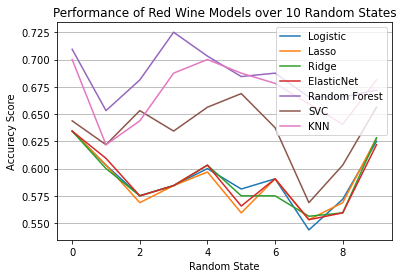

In [193]:
plt.plot(r_logistic_models, label="Logistic")
plt.plot(r_l1_models, label="Lasso")
plt.plot(r_l2_models, label="Ridge")
plt.plot(r_en_models, label="ElasticNet")
plt.plot(r_rf_models, label="Random Forest")
plt.plot(r_sv_models, label="SVC")
plt.plot(r_knn_models, label="KNN")
plt.grid(axis='y')
plt.xlabel("Random State")
plt.ylabel("Accuracy Score")
plt.title("Performance of Red Wine Models over 10 Random States")
plt.legend()
plt.savefig('figures/red_wine_model.png', dpi=300, format='png')
plt.show()

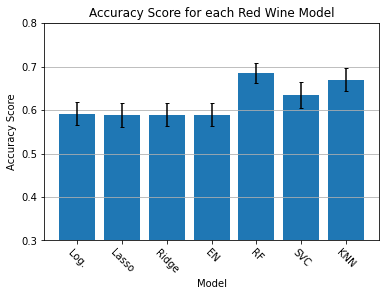

In [212]:
from statistics import mean, stdev

labels = ["Log.", "Lasso", "Ridge", "EN", "RF", "SVC", "KNN"]
r_scores = [r_logistic_models, r_l1_models, r_l2_models, r_en_models, r_rf_models, r_sv_models, r_knn_models]
r_mean_scores = [mean(score) for score in r_scores]
r_stdev_scores = [stdev(score) for score in r_scores]

plt.bar(labels, r_mean_scores, yerr=r_stdev_scores, capsize=2)
plt.ylim([0.3,0.8])
plt.xticks(rotation=-45)
plt.grid(axis='y')
plt.xlabel("Model")
plt.ylabel("Accuracy Score")
plt.title("Accuracy Score for each Red Wine Model")
plt.savefig('figures/score_by_model.png', dpi=300, format='png')
plt.show()

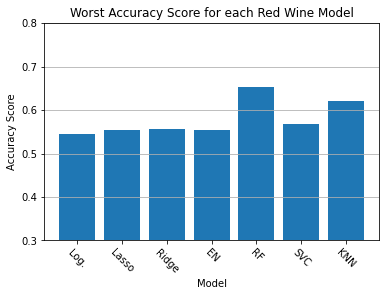

In [222]:
r_min_scores = [min(score) for score in r_scores]

plt.bar(labels, r_min_scores)
plt.ylim([0.3,0.8])
plt.xticks(rotation=-45)
plt.grid(axis='y')
plt.xlabel("Model")
plt.ylabel("Accuracy Score")
plt.title("Worst Accuracy Score for each Red Wine Model")
plt.savefig('figures/worst_score_by_model.png', dpi=300, format='png')
plt.show()

In [234]:
rf = RandomForestClassifier()
param_grid_rf = {'randomforestclassifier__max_features': [3, 5, 7, 10, None], 
              'randomforestclassifier__max_depth': [3, 5, 10, 20, 30, None]
}

rf_model = MLpipe_KFold(rX, ry, preprocessor, rf, param_grid_rf)

print(rf_model)

Fitting 4 folds for each of 30 candidates, totalling 120 fits
Fitting 4 folds for each of 30 candidates, totalling 120 fits
Fitting 4 folds for each of 30 candidates, totalling 120 fits
Fitting 4 folds for each of 30 candidates, totalling 120 fits
Fitting 4 folds for each of 30 candidates, totalling 120 fits
Fitting 4 folds for each of 30 candidates, totalling 120 fits
Fitting 4 folds for each of 30 candidates, totalling 120 fits
Fitting 4 folds for each of 30 candidates, totalling 120 fits
Fitting 4 folds for each of 30 candidates, totalling 120 fits
Fitting 4 folds for each of 30 candidates, totalling 120 fits
([Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['fixed acidity',
                                                  

In [235]:
log = LogisticRegression()
log_param_grid = {'logisticregression__max_iter': [100000]}

log_w_final, log_w_scores = MLpipe_KFold(wX, wy, preprocessor, log, log_param_grid)
w_logistic_models = log_w_scores
print(w_logistic_models)
print("Mean", {np.mean(w_logistic_models)}, "std", {np.std(w_logistic_models)})

Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
[0.634375, 0.603125, 0.575, 0.584375, 0.6, 0.58125, 0.590625, 0.54375, 0.571875, 0.625]
Mean {0.5330612244897959} std {0.012754693871020212}


In [237]:
l1 = LogisticRegression(penalty='l1', solver='saga')
l1_param_grid = {'logisticregression__C': [1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3, 1e4],
              'logisticregression__max_iter': [100000]}


l1_w_final, l1_w_scores = MLpipe_KFold(wX, wy, preprocessor, l1, l1_param_grid)
w_l1_models = l1_w_scores
print(w_l1_models)
print("Mean", {np.mean(w_l1_models)}, "std", {np.std(w_l1_models)})

Fitting 4 folds for each of 9 candidates, totalling 36 fits
Fitting 4 folds for each of 9 candidates, totalling 36 fits
Fitting 4 folds for each of 9 candidates, totalling 36 fits
Fitting 4 folds for each of 9 candidates, totalling 36 fits
Fitting 4 folds for each of 9 candidates, totalling 36 fits
Fitting 4 folds for each of 9 candidates, totalling 36 fits
Fitting 4 folds for each of 9 candidates, totalling 36 fits
Fitting 4 folds for each of 9 candidates, totalling 36 fits
Fitting 4 folds for each of 9 candidates, totalling 36 fits
Fitting 4 folds for each of 9 candidates, totalling 36 fits
[0.5163265306122449, 0.5295918367346939, 0.5306122448979592, 0.5469387755102041, 0.5295918367346939, 0.5224489795918368, 0.5163265306122449, 0.536734693877551, 0.5326530612244897, 0.5561224489795918]
Mean {0.5317346938775509} std {0.011930050885017932}


In [238]:
l2 = LogisticRegression(penalty='l2', solver='saga')
l2_param_grid = {'logisticregression__C': [1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3, 1e4],
              'logisticregression__max_iter': [100000]}


l2_w_final, l2_w_scores = MLpipe_KFold(wX, wy, preprocessor, l2, l2_param_grid)
w_l2_models = l2_w_scores
print(w_l2_models)
print("Mean", {np.mean(w_l2_models)}, "std", {np.std(w_l2_models)})

Fitting 4 folds for each of 9 candidates, totalling 36 fits
Fitting 4 folds for each of 9 candidates, totalling 36 fits
Fitting 4 folds for each of 9 candidates, totalling 36 fits
Fitting 4 folds for each of 9 candidates, totalling 36 fits
Fitting 4 folds for each of 9 candidates, totalling 36 fits
Fitting 4 folds for each of 9 candidates, totalling 36 fits
Fitting 4 folds for each of 9 candidates, totalling 36 fits
Fitting 4 folds for each of 9 candidates, totalling 36 fits
Fitting 4 folds for each of 9 candidates, totalling 36 fits
Fitting 4 folds for each of 9 candidates, totalling 36 fits
[0.5081632653061224, 0.5448979591836735, 0.5306122448979592, 0.5469387755102041, 0.5295918367346939, 0.5224489795918368, 0.5163265306122449, 0.5357142857142857, 0.5346938775510204, 0.5571428571428572]
Mean {0.5326530612244897} std {0.013968787721344984}


In [239]:
en = LogisticRegression(penalty='elasticnet', solver='saga')
en_param_grid = {'logisticregression__C': [1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3, 1e4],
              'logisticregression__l1_ratio': [0.01, 0.1, 0.25, 0.5, 0.75, 0.9, 0.99],
              'logisticregression__max_iter': [100000]}

en_w_final, en_w_scores = MLpipe_KFold(wX, wy, preprocessor, en, en_param_grid)
w_en_models = en_w_scores
print(w_en_models)
print("Mean", {np.mean(w_en_models)}, "std", {np.std(w_en_models)})

Fitting 4 folds for each of 63 candidates, totalling 252 fits
Fitting 4 folds for each of 63 candidates, totalling 252 fits
Fitting 4 folds for each of 63 candidates, totalling 252 fits
Fitting 4 folds for each of 63 candidates, totalling 252 fits
Fitting 4 folds for each of 63 candidates, totalling 252 fits
Fitting 4 folds for each of 63 candidates, totalling 252 fits
Fitting 4 folds for each of 63 candidates, totalling 252 fits
Fitting 4 folds for each of 63 candidates, totalling 252 fits
Fitting 4 folds for each of 63 candidates, totalling 252 fits
Fitting 4 folds for each of 63 candidates, totalling 252 fits
[0.5081632653061224, 0.5316326530612245, 0.5295918367346939, 0.5469387755102041, 0.5295918367346939, 0.5224489795918368, 0.5163265306122449, 0.5357142857142857, 0.5336734693877551, 0.5561224489795918]
Mean {0.5310204081632652} std {0.013148623402322137}


In [240]:
svc = SVC()
svc_param_grid = {'svc__C': [1e-2, 1e-1, 1e0, 1e1, 1e2], 
              'svc__gamma': list(np.logspace(-1, 2, 5))}

svc_w_final, svc_w_scores = MLpipe_KFold(wX, wy, preprocessor, svc, svc_param_grid)
w_sv_models = svc_w_scores 
print(w_sv_models)
print("Mean", {np.mean(w_sv_models)}, "std", {np.std(w_sv_models)})

Fitting 4 folds for each of 25 candidates, totalling 100 fits
Fitting 4 folds for each of 25 candidates, totalling 100 fits
Fitting 4 folds for each of 25 candidates, totalling 100 fits
Fitting 4 folds for each of 25 candidates, totalling 100 fits
Fitting 4 folds for each of 25 candidates, totalling 100 fits
Fitting 4 folds for each of 25 candidates, totalling 100 fits
Fitting 4 folds for each of 25 candidates, totalling 100 fits
Fitting 4 folds for each of 25 candidates, totalling 100 fits
Fitting 4 folds for each of 25 candidates, totalling 100 fits
Fitting 4 folds for each of 25 candidates, totalling 100 fits
[0.6275510204081632, 0.6387755102040816, 0.6612244897959184, 0.6479591836734694, 0.6255102040816326, 0.6581632653061225, 0.6581632653061225, 0.6408163265306123, 0.6602040816326531, 0.6785714285714286]
Mean {0.6496938775510205} std {0.015801836680661513}


In [241]:
rf = RandomForestClassifier()
param_grid_rf = {'randomforestclassifier__max_features': [3, 5, 7, 10, None], 
              'randomforestclassifier__max_depth': [3, 5, 10, 20, 30, None]
}

rf_w_final, rf_w_scores = MLpipe_KFold(wX, wy, preprocessor, rf, param_grid_rf)
w_rf_models = rf_w_scores 
print(r_rf_models)
print("Mean", {np.mean(w_rf_models)}, "std", {np.std(w_rf_models)})

Fitting 4 folds for each of 30 candidates, totalling 120 fits
Fitting 4 folds for each of 30 candidates, totalling 120 fits
Fitting 4 folds for each of 30 candidates, totalling 120 fits
Fitting 4 folds for each of 30 candidates, totalling 120 fits
Fitting 4 folds for each of 30 candidates, totalling 120 fits
Fitting 4 folds for each of 30 candidates, totalling 120 fits
Fitting 4 folds for each of 30 candidates, totalling 120 fits
Fitting 4 folds for each of 30 candidates, totalling 120 fits
Fitting 4 folds for each of 30 candidates, totalling 120 fits
Fitting 4 folds for each of 30 candidates, totalling 120 fits
[0.703125, 0.671875, 0.696875, 0.703125, 0.69375, 0.684375, 0.665625, 0.68125, 0.628125, 0.646875]
Mean {0.6742857142857144} std {0.011231908494544484}


In [242]:
knn = KNeighborsClassifier()
knn_param_grid = {'kneighborsclassifier__n_neighbors': [1, 3, 5, 10, 30, 100, 200], 
              'kneighborsclassifier__weights': ['uniform', 'distance']
             }

knn_w_final, knn_w_scores = MLpipe_KFold(wX, wy, preprocessor, knn, knn_param_grid)
w_knn_models = knn_w_scores 
print(w_knn_models)
print("Mean", {np.mean(w_knn_models)}, "std", {np.std(w_knn_models)})

Fitting 4 folds for each of 14 candidates, totalling 56 fits
Fitting 4 folds for each of 14 candidates, totalling 56 fits
Fitting 4 folds for each of 14 candidates, totalling 56 fits
Fitting 4 folds for each of 14 candidates, totalling 56 fits
Fitting 4 folds for each of 14 candidates, totalling 56 fits
Fitting 4 folds for each of 14 candidates, totalling 56 fits
Fitting 4 folds for each of 14 candidates, totalling 56 fits
Fitting 4 folds for each of 14 candidates, totalling 56 fits
Fitting 4 folds for each of 14 candidates, totalling 56 fits
Fitting 4 folds for each of 14 candidates, totalling 56 fits
[0.6408163265306123, 0.6785714285714286, 0.6928571428571428, 0.689795918367347, 0.65, 0.6714285714285714, 0.6612244897959184, 0.6642857142857143, 0.6795918367346939, 0.6816326530612244]
Mean {0.6710204081632652} std {0.01602528198318414}


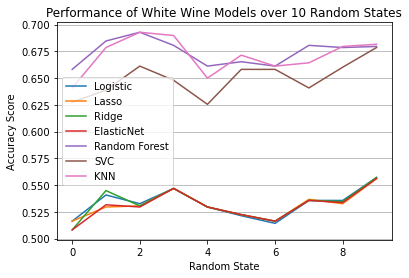

In [243]:
plt.plot(w_logistic_models, label="Logistic")
plt.plot(w_l1_models, label="Lasso")
plt.plot(w_l2_models, label="Ridge")
plt.plot(w_en_models, label="ElasticNet")
plt.plot(w_rf_models, label="Random Forest")
plt.plot(w_sv_models, label="SVC")
plt.plot(w_knn_models, label="KNN")
plt.grid(axis='y')
plt.xlabel("Random State")
plt.ylabel("Accuracy Score")
plt.title("Performance of White Wine Models over 10 Random States")
plt.legend()
plt.savefig('figures/white_wine_model.png', dpi=300, format='png')
plt.show()

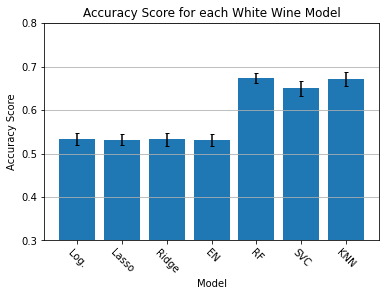

In [244]:
labels = ["Log.", "Lasso", "Ridge", "EN", "RF", "SVC", "KNN"]
w_scores = [w_logistic_models, w_l1_models, w_l2_models, w_en_models, w_rf_models, w_sv_models, w_knn_models]
w_mean_scores = [mean(score) for score in w_scores]
w_stdev_scores = [stdev(score) for score in w_scores]

plt.bar(labels, w_mean_scores, yerr=w_stdev_scores, capsize=2)
plt.ylim([0.3,0.8])
plt.xticks(rotation=-45)
plt.grid(axis='y')
plt.xlabel("Model")
plt.ylabel("Accuracy Score")
plt.title("Accuracy Score for each White Wine Model")
plt.savefig('figures/score_by_model_whitewine.png', dpi=300, format='png')
plt.show()

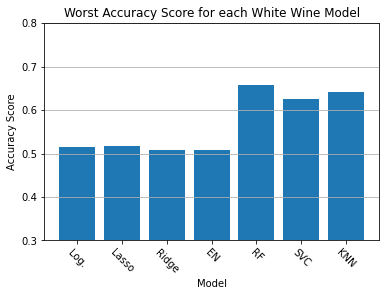

In [245]:
w_min_scores = [min(score) for score in w_scores]

plt.bar(labels, w_min_scores)
plt.ylim([0.3,0.8])
plt.xticks(rotation=-45)
plt.grid(axis='y')
plt.xlabel("Model")
plt.ylabel("Accuracy Score")
plt.title("Worst Accuracy Score for each White Wine Model")
plt.savefig('figures/worst_score_by_model_whitewine.png', dpi=300, format='png')
plt.show()

In [246]:
rf_w_final, rf_w_scores

([Pipeline(steps=[('columntransformer',
                   ColumnTransformer(transformers=[('num',
                                                    Pipeline(steps=[('scaler',
                                                                     StandardScaler())]),
                                                    ['fixed acidity',
                                                     'volatile acidity',
                                                     'citric acid',
                                                     'residual sugar',
                                                     'chlorides',
                                                     'free sulfur dioxide',
                                                     'total sulfur dioxide',
                                                     'density', 'pH', 'sulphates',
                                                     'alcohol'])])),
                  ('randomforestclassifier',
                   RandomForestCla